In [1]:
# Import Library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load Dataset
df = pd.read_csv("netflix_titles.csv")

# Filter hanya film (Bukan show)
movies = df[df['type'] == 'Movie'].copy()

# Ubah durasi menjadi angka (tanpa 'min')
movies['duration_minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# Buang data kosong 
movies.dropna(subset=['duration_minutes', 'release_year'], inplace=True)

# Statistik deskriptif
mean_dur = movies['duration_minutes'].mean()
median_dur = movies['duration_minutes'].median()
std_dur = movies['duration_minutes'].std()

# Regresi linier
x = movies['release_year']
y = movies['duration_minutes']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("\n=== Regresi Linier ===")
print(f"Persamaan : durasi = {slope:.2f} * tahun + {intercept:.2f}")
print(f"R-squared : {r_value**2:.4f}")
print(f"P-value   : {p_value:.4f}")



=== Regresi Linier ===
Persamaan : durasi = -0.60 * tahun + 1313.22
R-squared : 0.0426
P-value   : 0.0000


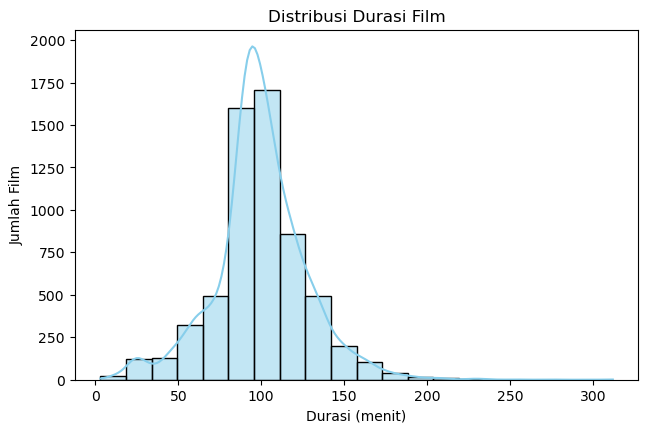

In [10]:
plt.figure (figsize=(16, 10))
# Histogram 
plt.subplot(2, 2, 1)
sns.histplot(movies['duration_minutes'], bins=20, kde=True, color='Skyblue')
plt.title("Distribusi Durasi Film")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.show()

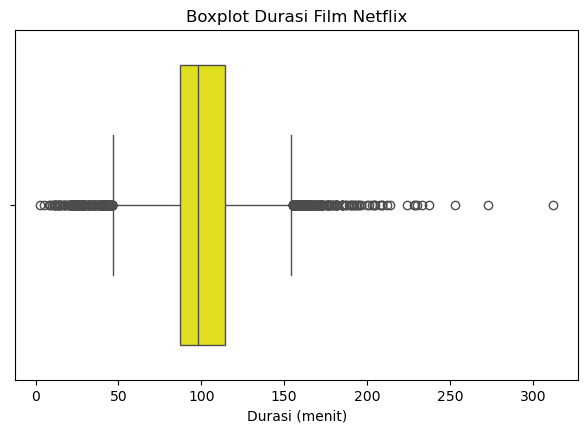

In [18]:
plt.figure (figsize=(16, 10))
# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=movies['duration_minutes'], color='Yellow')
plt.title("Boxplot Durasi Film Netflix")
plt.xlabel("Durasi (menit)")
plt.show()           

<function matplotlib.pyplot.show(close=None, block=None)>

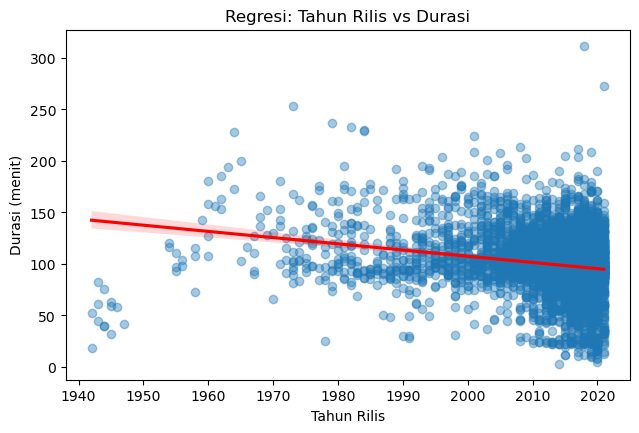

In [20]:
plt.figure (figsize=(16, 10))
#Scatter Plot + Regresi
plt.subplot(2, 2, 3)
sns.regplot(x='release_year', y='duration_minutes', data=movies,scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title("Regresi: Tahun Rilis vs Durasi")
plt.xlabel("Tahun Rilis")
plt.ylabel("Durasi (menit)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

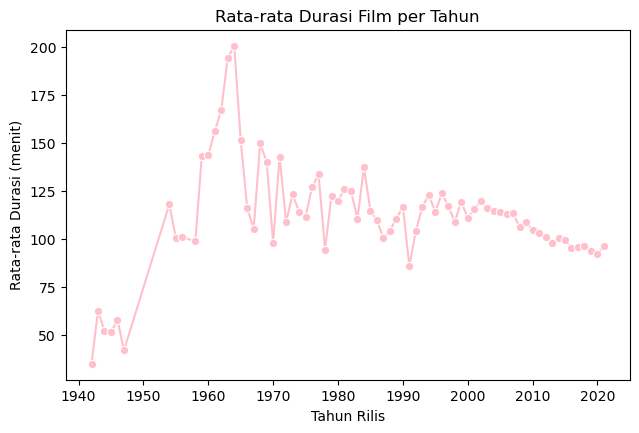

In [27]:
plt.figure (figsize=(16, 10))
# Tren Rata-rata Durasi Film Pertahun
plt.subplot(2, 2, 4)
mean_per_year = movies.groupby('release_year')['duration_minutes'].mean()
sns.lineplot(x=mean_per_year.index, y=mean_per_year.values, marker="o", color='pink')
plt.title("Rata-rata Durasi Film per Tahun")
plt.xlabel("Tahun Rilis")
plt.ylabel("Rata-rata Durasi (menit)")
plt.show